## Learning Preparation

**Dataset Preparation**


    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from dataset_generator import dataset_generator
import basic_nodes as nodes

dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0]) #5x

x_data, y_data = dataset_gen.make_dataset()

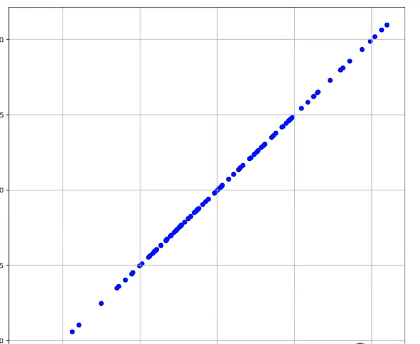

In [ ]:
#model implementation

node1 = nodes.mul_node()

#square error
node2 = nodes.minus_node()
node3 = nodes.square_node()

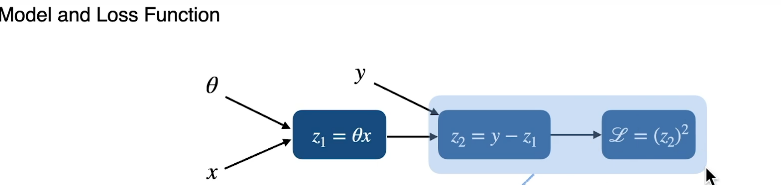

**Hyperparameter Setting**

In [ ]:
epochs = 5
lr = 0.01

th = -1 #arbitrary 세타
loss_list = []
th_list= []

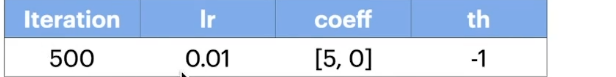

## Learning Process




In [ ]:
for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x,y = x_data[data_idx], y_data[data_idx]

        z1 = node1.forward(th,x)
        z2 = node2.forward(y,z1)
        l = node3.forward(z2)

        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)

        th = th -lr*dth #gradient descent로 세타 변화

        th_list.append(th)
        loss_list.append(l)

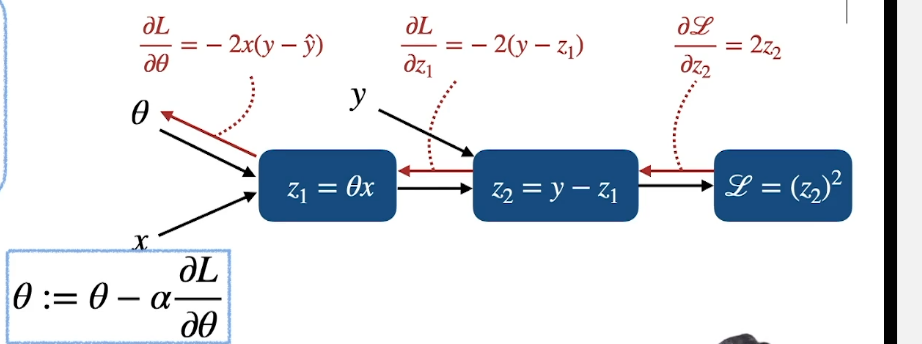

Result Visuauzation

In [ ]:
fig, ax = plt.subplots(2,1, figsize= (30,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color':'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta\', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", fontdict = label_font)

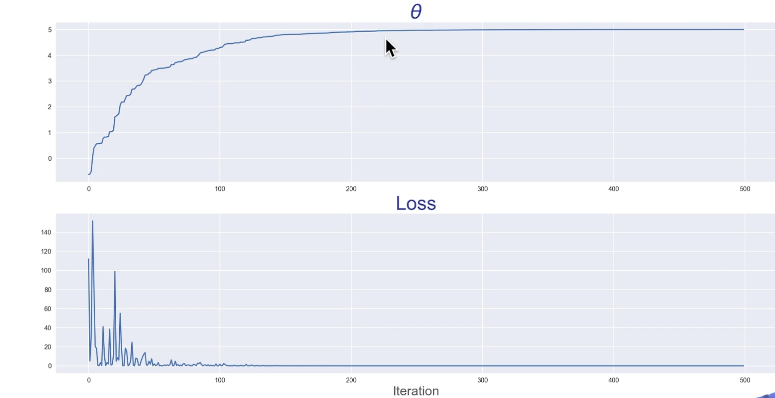

In [ ]:
import matplotlib.cm as cm

N_line = 200
cmap = cm.get_cmap('rainbow', lut =N_line)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])


for line_idx in range(N_line):
    pred_line = np.array([x_range[0]*test_th[line_idx],
                          x_range[1]*test_th[line_idx]]) #예측값 = 세타 x X

    ax.plot(x_range, pred_line, color = cmap(line_idx), alpha = 0.1)

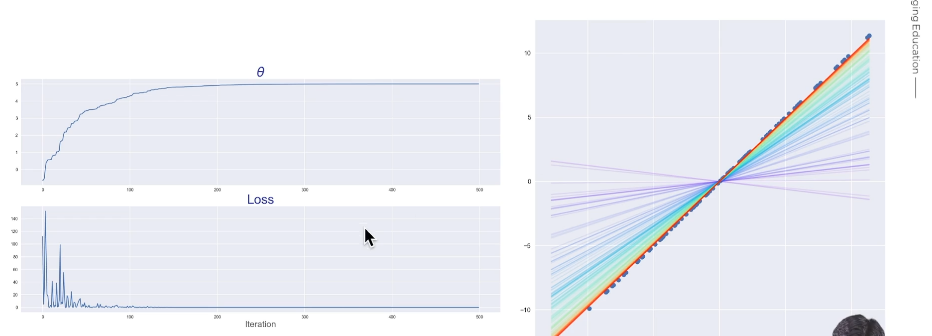